<a href="https://colab.research.google.com/github/nenaplnk/mai_LR_style_net/blob/main/style_zima_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
from PIL import Image

In [150]:
img = Image.open('/content/photo_2025-10-10_15-16-01.jpg').convert('RGB')

In [151]:

img_style = Image.open('/content/vangog.jpg').convert('RGB')

In [152]:
import torch
import torchvision.transforms.v2 as tfs
import torch.nn as nn
from torchvision import models
import torch.optim as optim

In [153]:
import matplotlib.pyplot as plt


In [154]:
trans = tfs.Compose(
    [
        tfs.Resize((256, 256)),
        tfs.ToImage(),
        tfs.ToDtype(torch.float32, scale = True)
    ]
)

In [155]:
img = trans(img).to("cuda:0")
img_style = trans(img_style).to("cuda:0")

In [156]:
img = img.unsqueeze(0)
img_style = img_style.unsqueeze(0)

In [157]:
img_create = img.clone()
img_create.requires_grad_(True)

tensor([[[[0.5765, 0.5961, 0.5098,  ..., 0.5137, 0.5373, 0.5333],
          [0.5255, 0.5961, 0.5137,  ..., 0.5098, 0.5412, 0.5176],
          [0.4745, 0.5843, 0.5255,  ..., 0.5176, 0.5529, 0.5137],
          ...,
          [0.7490, 0.7490, 0.7608,  ..., 0.6824, 0.6588, 0.6706],
          [0.7686, 0.7961, 0.7451,  ..., 0.6510, 0.6745, 0.6667],
          [0.6471, 0.7176, 0.7922,  ..., 0.6510, 0.6706, 0.6824]],

         [[0.4353, 0.4588, 0.3686,  ..., 0.3843, 0.4039, 0.3961],
          [0.3843, 0.4549, 0.3686,  ..., 0.3804, 0.4078, 0.3804],
          [0.3333, 0.4431, 0.3843,  ..., 0.3882, 0.4157, 0.3765],
          ...,
          [0.6510, 0.6510, 0.6627,  ..., 0.4941, 0.4784, 0.5020],
          [0.6706, 0.6980, 0.6471,  ..., 0.4588, 0.4941, 0.4980],
          [0.5490, 0.6196, 0.6941,  ..., 0.4588, 0.4902, 0.5137]],

         [[0.3451, 0.3529, 0.2471,  ..., 0.2667, 0.3059, 0.3098],
          [0.2941, 0.3529, 0.2471,  ..., 0.2627, 0.3059, 0.2941],
          [0.2431, 0.3373, 0.2588,  ..., 0

In [158]:
img_create = img_create.to('cuda:0')

In [159]:
model = models.vgg19(models.VGG19_Weights.DEFAULT)


In [160]:
mf = model.features

In [161]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [162]:
class Style_Net(nn.Module):
  def __init__(self):
    super().__init__()
    _model = models.vgg19(models.VGG19_Weights.DEFAULT)
    self.mf = _model.features
    self.mf.requires_grad_(False)
    self.requires_grad_(False)
    self.mf.eval()
    self.indx_out = (0, 5, 10, 19, 28, 34)
    self.num_style_layers = len(self.indx_out)-1
  def forward(self, x):
    outputs = []
    for indx, layer in enumerate(self.mf):
      x = layer(x)
      if indx in self.indx_out:
        outputs.append(x.squeeze(0))
    return outputs

In [163]:
model = Style_Net().to("cuda:0")

In [164]:
model

Style_Net(
  (mf): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [165]:
outputs_img = model(img.squeeze(0))
outputs_img_style = model(img_style.squeeze(0))

In [166]:
def get_loss_content(last_layer_img, last_layer_img_style):
  return torch.mean(torch.square(last_layer_img-last_layer_img_style))


In [167]:
def gram_matrix(x):
  channels = x.size(0)
  g = x.view(channels, -1)
  gram = torch.mm(g, g.mT)/g.size(1)
  return gram

In [168]:
def get_style_loss(base_style, gram_tsrget):
  style_weigths = [10.0, 0.8, 5.0, 3.0, 0.1]
  _loss = 0
  i = 0
  for ba, gr in zip(base_style, gram_tsrget):
    gram_style = gram_matrix(ba)
    _loss += style_weigths[i]*torch.mean(torch.square(gram_style - gr))
    i += 1
  return _loss

In [169]:
gram_matrix_style = [gram_matrix(x) for x in outputs_img_style[:model.num_style_layers]]

In [170]:
from math import inf
content_weight = 1
style_weight = 1000
best_loss = float(inf)
epochs = 500
best_img = img_create.clone()


In [171]:
optimizer = optim.Adam(params = [img_create], lr = 0.01)

In [172]:
for _e in range(epochs):
  outputs_img_create = model(img_create.squeeze(0))
  loss_content = get_loss_content(outputs_img_create[-1], outputs_img[-1])
  loss_style = get_style_loss(outputs_img_create[:model.num_style_layers], gram_matrix_style)
  loss = content_weight*loss_content + style_weight*loss_style
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if loss < best_loss:
    best_loss = loss
    best_img = img_create.clone()


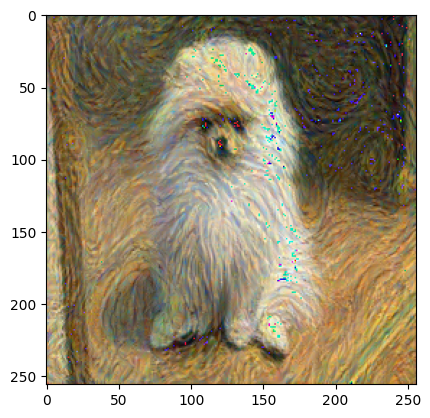

In [173]:
transf_to_img = tfs.Compose([tfs.ToDtype(torch.float32, scale=True),
                                tfs.ToPILImage()])
image = transf_to_img(best_img.squeeze())
image.save('result.jpg')
plt.imshow(image)
plt.show()

In [40]:
kan = Image.open("/content/photo_2025-10-10_15-16-01.jpg")

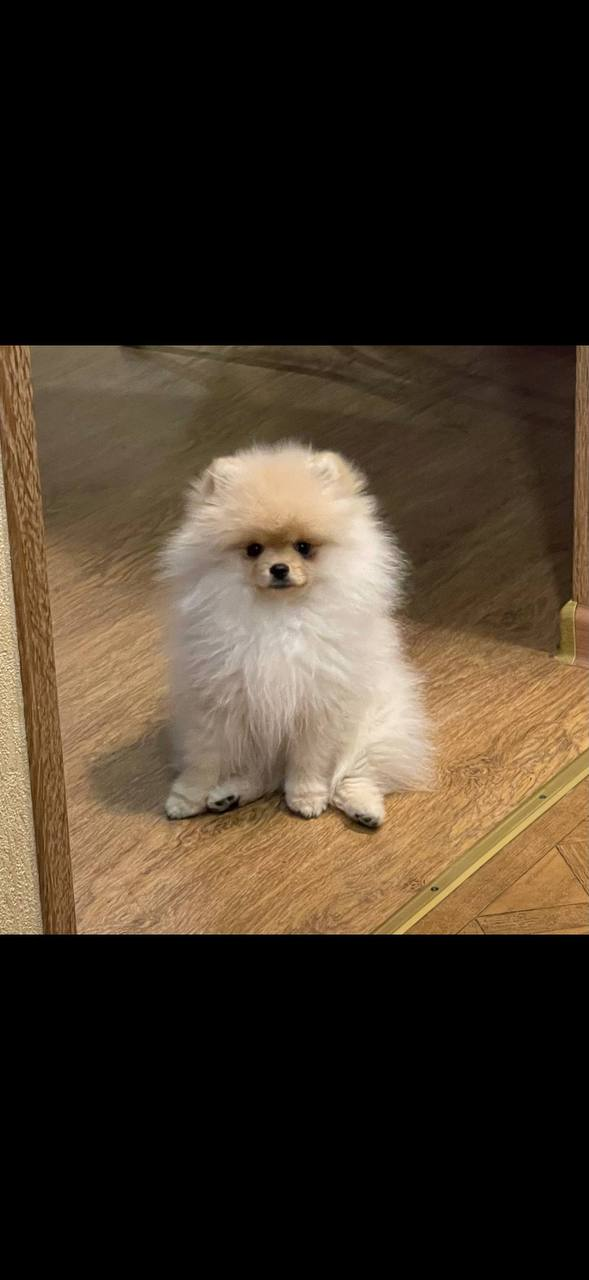

In [41]:
kan